# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile as zip
import seaborn as sns

# 2. Read the dataset

In [4]:
with zip.ZipFile('bank.zip') as z:
    with z.open('bank.csv') as f:
        df = pd.read_csv(f, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# 3. Simple EDA (Exploratory Data Analysis) of the Dataset

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import GSML 

In [5]:
df.info() # identify integers, objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


- create list and count values

In [6]:
for c in df.columns.to_list():
    if df[c].dtype == 'object':
        print(df[c].value_counts())
        print('\n' + '* - ' * 10)

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

* - * - * - * - * - * - * - * - * - * - 
married     2797
single      1196
divorced     528
Name: marital, dtype: int64

* - * - * - * - * - * - * - * - * - * - 
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

* - * - * - * - * - * - * - * - * - * - 
no     4445
yes      76
Name: default, dtype: int64

* - * - * - * - * - * - * - * - * - * - 
yes    2559
no     1962
Name: housing, dtype: int64

* - * - * - * - * - * - * - * - * - * - 
no     3830
yes     691
Name: loan, dtype: int64

* - * - * - * - * - * - * - * - * - * - 
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

* - * - * - * - * - * - * - * - * - * - 
may    1398
ju

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# 4. Extract Target and Features from the Dataset

In [8]:
y = df['y'].apply(lambda c: 1 if c == 'yes' else 0)

In [9]:
X = df.drop(labels=['y'], axis=1)

In [10]:
X.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3321,35,blue-collar,divorced,primary,no,1792,yes,no,cellular,31,jul,630,6,-1,0,unknown
2964,41,blue-collar,married,primary,no,4,no,no,cellular,23,jul,74,5,-1,0,unknown
3508,52,housemaid,married,secondary,no,14363,no,no,unknown,5,jun,132,1,-1,0,unknown
1761,35,technician,married,secondary,no,251,yes,yes,unknown,1,jul,128,3,-1,0,unknown
2109,27,admin.,single,secondary,no,-145,yes,no,telephone,15,may,289,8,-1,0,unknown
2232,38,technician,married,secondary,no,7696,yes,no,cellular,20,nov,386,2,-1,0,unknown
3775,41,management,divorced,tertiary,no,3355,no,no,cellular,14,oct,181,2,500,1,failure
761,27,blue-collar,single,primary,no,1128,yes,no,unknown,30,jun,88,4,-1,0,unknown
3502,32,management,divorced,tertiary,no,883,yes,no,cellular,10,dec,798,1,185,5,other
4081,26,management,single,secondary,no,565,yes,no,unknown,6,jun,582,11,-1,0,unknown


# 5. On-hot coding the Categorial Features of the Dataset

In [12]:
X = pd.get_dummies(X)

In [13]:
X.sample(10)

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
4385,32,1121,16,211,3,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3389,46,361,19,86,7,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3194,28,81,8,158,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2032,59,1727,25,500,4,358,2,0,0,0,...,0,0,1,0,0,0,1,0,0,0
217,30,975,13,256,2,351,2,0,1,0,...,0,0,1,0,0,0,1,0,0,0
787,50,3924,20,122,2,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3326,60,1472,20,36,4,-1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3378,34,0,13,172,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1045,58,299,16,120,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4308,44,5597,20,27,3,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


# 6. Scale the Numerical Features of the Dataset
- use MinMaxScaler

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 7. Model the Dataset Using Various SVM Algorithms

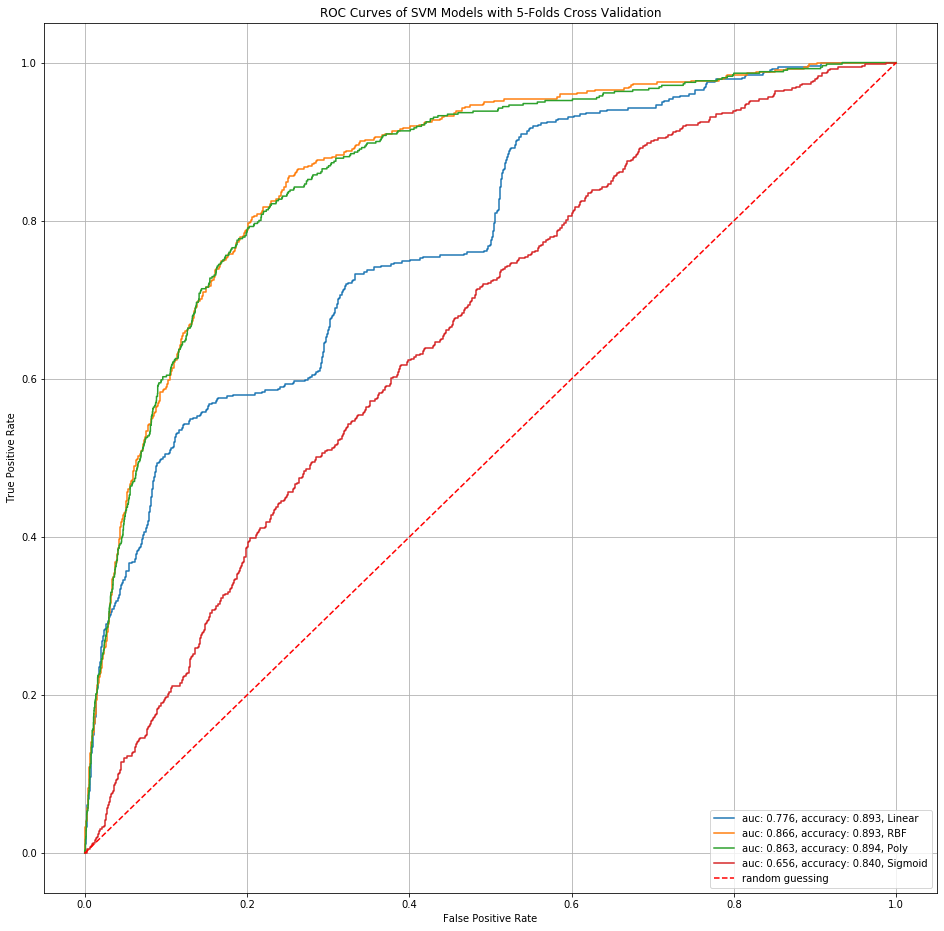

In [15]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.model_selection import cross_val_predict as CVP
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Create a dictionary of models to test
SVC_models = {'Linear': SVC(kernel='linear', probability=True),
              'RBF': SVC(kernel='rbf', probability=True),
              'Poly': SVC(kernel='poly', probability=True),
              'Sigmoid': SVC(kernel='sigmoid', probability=True)}

# Iterate through each model to train, predict, and plot the ROC curve
for name, model in SVC_models.items():
    # 10-fold cross validation, compute the probability of predictions and accuracy for y
    y_predict_proba = CVP(model, X_scaled, y, cv=5, method='predict_proba')
    y_predict = CVP(model, X_scaled, y, cv=5)
    accuracy = accuracy_score(y, y_predict)
    
    # Plot the ROC curves
    fpr, tpr, _ = roc_curve(y, y_predict_proba[:, 1])
    auc_score   = roc_auc_score(y, y_predict_proba[:, 1])
    plt.plot(fpr, tpr, label='auc: {:.3f}, accuracy: {:.3f}, {}'\
             .format(auc_score, accuracy, name))
    
plt.gcf().set_size_inches(16, 16)
plt.plot([0, 1], [0, 1], linestyle='dashed', color='red', label='random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of SVM Models with 5-Folds Cross Validation')
plt.grid()
plt.legend(loc='lower right')
plt.show()


# 8. Compare the Best SVM Algorithms with Linear Regression, LDA

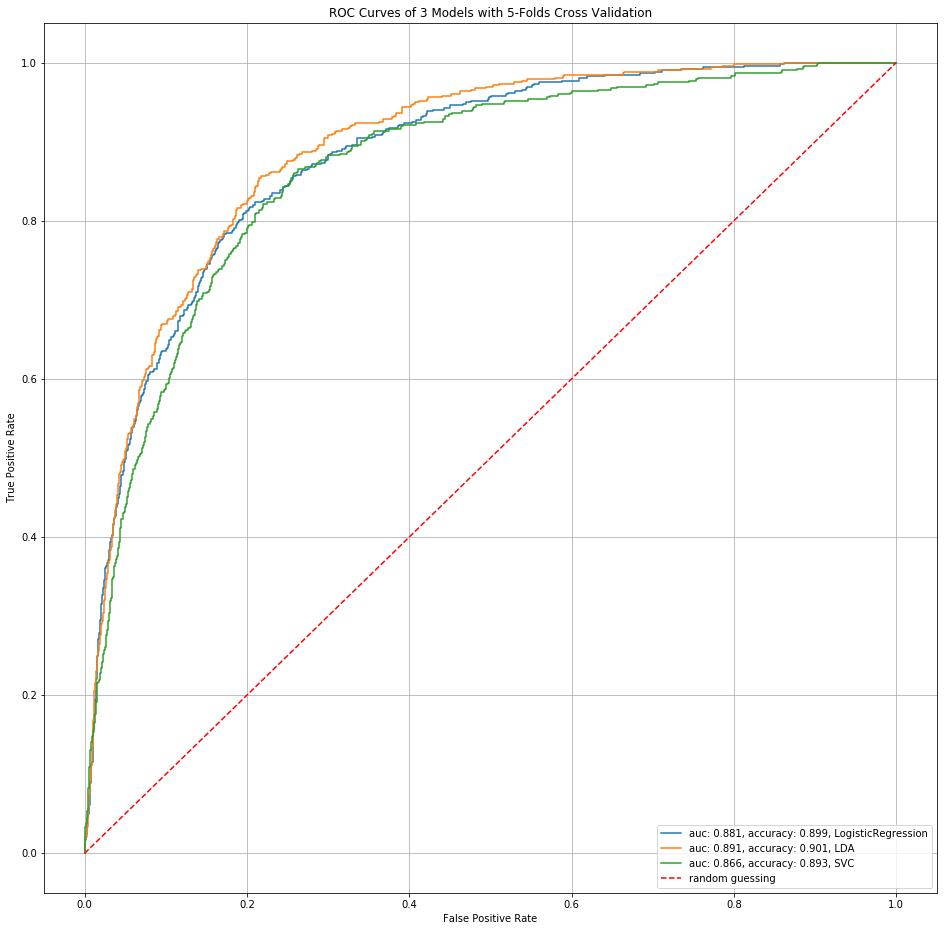

In [16]:
# Create a dictionary of models to test
models = {'LogisticRegression': LogisticRegression(),
          'LDA': LDA(),
          'SVC': SVC(probability=True)}

# Iterate through each model to train, predict, and plot the ROC curve
for name, model in models.items():
    # 10-fold cross validation, compute the probability of predictions and accuracy for y
    y_predict_proba = CVP(model, X_scaled, y, cv=5, method='predict_proba')
    y_predict = CVP(model, X_scaled, y, cv=5)
    accuracy = accuracy_score(y, y_predict)
    
    # Plot the ROC curves
    fpr, tpr, _ = roc_curve(y, y_predict_proba[:, 1])
    auc_score   = roc_auc_score(y, y_predict_proba[:, 1])
    plt.plot(fpr, tpr, label='auc: {:.3f}, accuracy: {:.3f}, {}'\
             .format(auc_score, accuracy, name))
    
plt.gcf().set_size_inches(16, 16)
plt.plot([0, 1], [0, 1], linestyle='dashed', color='red', label='random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of 3 Models with 5-Folds Cross Validation')
plt.grid()
plt.legend(loc='lower right')
plt.show()

NameError: name 'DF' is not defined

# 2.Version with GSML

 d. Extract the DataFrame column labeled \y" as your Y variable, e.g., using list
comprehension, possibly with
Y=np.array([1 if x=="yes" else 0 for x in DF["y"]])

In [21]:
Y  = np.array([1 if x=="yes" else 0 for x in df['y']])

 e. Use the remaining columns into your X data. Convert the
categorical data into numerical using get_dummies and then into a numpy array.

In [24]:
# get x_data using get_dummies as a numpy array
input_data = np.array(pd.get_dummies(df.iloc[:,:-1]))

f. Classify the data using SVM. Determine an accuracy and make an
roc plot. Compare with other classification methods.

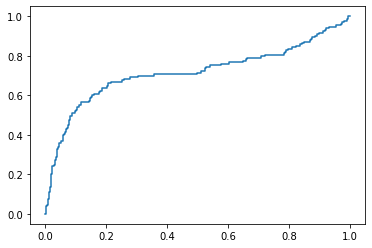

In [37]:
# train test split data
x_train, x_test, y_train, y_test = train_test_split(input_data, Y)

# classify with SVM
SVM = SVC(kernel="rbf", probability=True)
SVM.fit(x_train, y_train)
y_predicted = SVM.predict(x_test)
SVM_accuracy = accuracy_score(y_test, y_predicted)
proba = SVM.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, proba)

plt.plot(fpr,tpr, label="rbf: %.2f"%(SVM_accuracy*100))

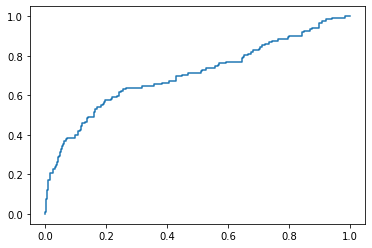

In [40]:
# classify with SVM
SVM = SVC(kernel="rbf", probability=True)
SVM.fit(x_train, y_train)
y_predicted = SVM.predict(x_test)
SVM_accuracy = accuracy_score(y_test, y_predicted)
proba = SVM.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, proba)

plt.plot(fpr,tpr, label="rbf: %.2f"%(SVM_accuracy*100))

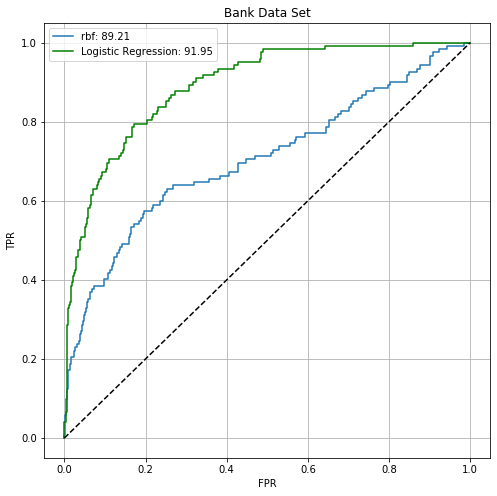

In [39]:
# f. Classify the data using SVM. Determine an accuracy and make an
# roc plot. Compare with other classification methods.

# train test split data
x_train, x_test, y_train, y_test = train_test_split(input_data, Y)

# classify with SVM
SVM = SVC(kernel="rbf", probability=True)
SVM.fit(x_train, y_train)
y_predicted = SVM.predict(x_test)
SVM_accuracy = accuracy_score(y_test, y_predicted)
proba = SVM.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, proba)

plt.plot(fpr,tpr, label="rbf: %.2f"%(SVM_accuracy*100))

# classify with logistic regression
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(x_train, y_train)
y_predicted = log_reg.predict(x_test)
log_accuracy = accuracy_score(y_test, y_predicted)
proba = log_reg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, proba)

plt.plot(fpr,tpr, c='g', label='Logistic Regression: %.2f'%(log_accuracy*100))


plt.plot([0,1],[0,1], ls='--', c='k')
plt.legend()
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Bank Data Set")
plt.gcf().set_size_inches(8,8)
plt.show()  